# Partie 1 "Problem Solving"


## 1. Vacance et bagage
---

### Implementation
---
Cette implémentation utilise la méthode de programmation dynamique pour résoudre ce problème, qui est un exemple classique du problème du "sac à dos" (Knapsack Problem).

In [1]:
def take_objects(obj_importance:list[int], obj_sizes:list[int],car_space:int) -> list[int]:
  if(len(obj_importance)!=len(obj_sizes)):
    raise ValueError("obj_importance and obj_sizes must have the same length")
  n = len(obj_importance)
  dp = [[0 for _ in range(car_space+1)] for _ in range(n+1)]
  # Remplir le tableau dp
  for i in range(1, n + 1):
      for w in range(car_space + 1):
          if obj_sizes[i-1] <= w:
              dp[i][w] = max(dp[i-1][w], dp[i-1][w - obj_sizes[i-1]] + obj_importance[i-1])
          else:
              dp[i][w] = dp[i-1][w]

  # Retrouver les objets pris
  w = car_space
  taken_objects = []
  for i in range(n, 0, -1):
      if dp[i][w] != dp[i-1][w]:
          taken_objects.append(i-1)
          w -= obj_sizes[i-1]

  return taken_objects[::-1]


cet algorithme est optimal pour résoudre ce problème.

La complexité temporelle de l'algorithme est **𝑂(𝑛 × car_space)** et la complexité en espace est également  **𝑂(𝑛 × car_space)**


### Test simple
---
Dans cette section, nous allons tester l'algorithme avec un cas simple pour vérifier son bon fonctionnement. Nous utilisons un exemple avec quatre objets ayant différentes tailles et importances, et une capacité de voiture limitée à 10

In [2]:
obj_importance = [10, 40, 30, 50]
obj_sizes = [5, 4, 6, 3]
car_space = 10
take_objects(obj_importance, obj_sizes, car_space)


[1, 3]

### Test Case
---
Dans cette section, nous allons tester l'algorithme avec plusieurs cas d'essai stockés dans un fichier texte. Le fichier contient différentes configurations d'objets, de tailles, et de capacité de voiture, ainsi que les résultats attendus pour chaque cas. Nous utilisons ces cas pour évaluer l'exactitude de l'algorithme en comparant les résultats obtenus avec ceux attendus. Le fichier de test est lu, chaque cas est traité, et la fonction take_objects est exécutée pour chaque scénario. Les résultats obtenus sont ensuite comparés aux résultats attendus pour déterminer si l'algorithme passe ou échoue à chaque test.

Ce processus garantit que l'algorithme fonctionne correctement pour une variété de scénarios.

In [3]:
def read_test_cases(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    test_cases = []
    for i in range(0, len(lines), 5):  # Assuming each test case has 5 lines (including blank lines)
        obj_importance = list(map(int, lines[i].strip().split()))
        obj_sizes = list(map(int, lines[i+1].strip().split()))
        car_space = int(lines[i+2].strip())

        # Process expected result (handle multiple solutions and empty lists)
        expected_result_line = lines[i+3].strip()
        if "Expected output is empty" in expected_result_line:
            expected_result = [[]]  # Expecting an empty list
        else:
            expected_result = [list(map(int, sol.strip().split())) for sol in expected_result_line.split('|')]

        test_cases.append((obj_importance, obj_sizes, car_space, expected_result))

    return test_cases

In [4]:
def evaluate_function(function, test_cases):
    total_tests = len(test_cases)
    passed_tests = 0
    failed_tests = []

    for index, (obj_importance, obj_sizes, car_space, expected_results) in enumerate(test_cases):
        result = function(obj_importance, obj_sizes, car_space)

        # Check if the result matches any of the expected results
        if any(sorted(result) == sorted(expected) for expected in expected_results):
            passed_tests += 1
        else:
            failed_tests.append((index, result, expected_results))

    # Report results
    if passed_tests == total_tests:
        print(f"\033[92mCorrect Answer! Test passed {passed_tests}/{total_tests}\033[0m")
    else:
        print(f"\033[91mWrong Answer! Test passed {passed_tests}/{total_tests}\033[0m")
        
    if failed_tests:
        print("\nFailed Test Cases:")
        for index, result, expected_results in failed_tests:
            print(f"Test case {index + 1}:")
            print(f"  Got: {result}")
            print(f"  Expected: {expected_results}")

 ⚠️ Attention : 

Veuillez noter que pour exécuter correctement la section des **Test Cases**, le fichier de test doit être présent dans le chemin spécifié : `TestCase/vac_bag.txt`. Si ce fichier n'est pas trouvé, la cellule contenant le test ne fonctionnera pas correctement. Cependant, cela **n'affectera pas l'exécution des autres cellules** du notebook, et l'algorithme continuera de fonctionner normalement pour les autres sections. Assurez-vous que le fichier est correctement placé pour éviter toute erreur dans cette section spécifique.

In [5]:
# Load test cases
test_cases = read_test_cases("Testcase/vac_bag.txt")

# Evaluate the function
evaluate_function(take_objects, test_cases)

Correct Answer! Test passed 28/28


### Testez votre propre exemple
---
À présent, c'est à vous de jouer ! Entrez votre propre cas de test ci-dessous et voyez comment l'algorithme réagit avec votre exemple.

**Saisissez les valeurs**

In [ ]:
# Saisir la capacité du voiture
while True:
    car_capacity = int(input("Entrez la capacité maximale du voiture : "))
    if car_capacity>=0:
        break
    print("Veuillez entrer un nombre valide.")

In [ ]:
# Saisir le nombre d'objets
num_objects = int(input("Entrez le nombre d'objets disponibles : "))
    
# Initialiser les listes pour les tailles et les importances des objets
obj_sizes = []
obj_importance = []
    
# Saisir les informations pour chaque objet
for i in range(num_objects):
    print(f"\nObjet {i + 1} :")
    size = int(input("  Taille : "))
    value = int(input("  Importance (valeur) : "))
    obj_sizes.append(size)
    obj_importance.append(value)

Entrez le nombre d'objets disponibles :  4



Objet 1 :


  Taille :  5
  Importance (valeur) :  10



Objet 2 :


  Taille :  4
  Importance (valeur) :  40



Objet 3 :


  Taille :  6
  Importance (valeur) :  30



Objet 4 :


  Taille :  3
  Importance (valeur) :  50


**Résoudre le problème de "vacance et voyage" avec les données saisies**

In [ ]:
take_objects(obj_importance, obj_sizes, car_capacity)

[1, 3]

## 2. Fusionner plusieurs listes triées
---

### Implementation
---
Nous proposons une solution pour fusionner plusieurs listes triées efficacement.

**Définition d'une classe pour une liste chaînée simple**

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

**Code**

In [ ]:
# Fonction pour fusionner deux listes chaînées triées
def mergeTwoLists(list1, list2):
    # Création d'un nœud fictif pour construire la liste fusionnée
    dummy = ListNode()
    current = dummy

    # Tant qu'il y a des éléments dans les deux listes
    while list1 and list2:
        # Ajouter le plus petit élément entre list1 et list2 à la liste fusionnée
        if list1.val < list2.val:
            current.next = list1
            list1 = list1.next
        else:
            current.next = list2
            list2 = list2.next
        # Avancer dans la liste fusionnée
        current = current.next

    # Si une des listes est épuisée, lier le reste de l'autre liste
    if list1:
        current.next = list1
    if list2:
        current.next = list2

    # Retourner la liste fusionnée à partir du nœud suivant du nœud fictif
    return dummy.next

# Fonction pour fusionner plusieurs listes chaînées triées
def mergeKLists(lists):
    if not lists:  # Si la liste des listes est vide, retourner None
        return None

    while len(lists) > 1:
        merged_lists = []

        # Fusionner les listes deux par deux
        for i in range(0, len(lists), 2):
            list1 = lists[i]
            list2 = lists[i + 1] if i + 1 < len(lists) else None
            merged_lists.append(mergeTwoLists(list1, list2))
        
        # Mettre à jour les listes avec les listes fusionnées
        lists = merged_lists

    # Retourner la liste fusionnée finale
    return lists[0]


### Test simple
---
Dans ce test simple, nous vérifions que l'algorithme fonctionne avec quelques listes triées basiques.

**Fonction pour afficher une liste chaînée**

In [ ]:
def print_list(node):
    if not node:
        print("[ ]")
        return
    while node:
        print(node.val, end=" -> " if node.next else "")
        node = node.next
    print()

**Exemple d'utilisation**

In [ ]:
# l1, l2, l3, l4 doivent toutes être triées.

l1 = ListNode(1, ListNode(4, ListNode(5)))
l2 = ListNode(1, ListNode(3, ListNode(4)))
l3 = ListNode(2, ListNode(6))
l4 = ListNode(3, ListNode(7))

merged_list = mergeKLists([l1, l2, l3, l4])
# Print the merged list
print_list(merged_list)

1 -> 1 -> 2 -> 3 -> 3 -> 4 -> 4 -> 5 -> 6 -> 7


### Test Case
---
Nous utilisons des cas de test définis dans un fichier texte. Cela nous permet de tester plusieurs scénarios de manière structurée.

**Fonction pour convertir une liste Python en une liste chaînée**

In [ ]:
# Cette fonction prend une liste de valeurs et crée une liste chaînée correspondante
def list_to_linked_list(values):
    dummy = ListNode()
    current = dummy
    for val in values:
        current.next = ListNode(val)
        current = current.next
    return dummy.next

**Fonction pour convertir une liste chaînée en une liste Python**

In [ ]:
# Cette fonction extrait les valeurs d'une liste chaînée et les stocke dans une liste Python
def linked_list_to_list(node):
    result = []
    while node:
        result.append(node.val)
        node = node.next
    return result

**Fonction pour lire les cas de test à partir d'un fichier**

In [ ]:
# Le fichier contient les entrées et les sorties attendues pour chaque cas de test
def read_test_cases(file_path):
    test_cases = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            # Ignorer les lignes vides ou les commentaires
            if not line or line.startswith("#"):
                continue
            if line.startswith("Input:"):
                # Lire les données d'entrée
                input_data = line.replace("Input:", "").strip()
                # Traiter les listes, y compris les listes vides
                lists = [
                    list(map(int, lst.split(','))) if lst.strip() else [] 
                    for lst in input_data.split('|')
                ]
            elif line.startswith("Expected:"):
                # Lire les données de sortie attendue
                expected_data = (
                    list(map(int, line.replace("Expected:", "").strip().split(','))) 
                    if line.replace("Expected:", "").strip() 
                    else []
                )
                # Ajouter les cas de test dans la liste
                test_cases.append((lists, expected_data))
    return test_cases


**Fonction d'évaluation**

In [ ]:
def evaluate_function(test_cases):
    # Initialize counters
    total_tests = len(test_cases)
    passed_tests = 0

    for i, (case, expected) in enumerate(test_cases):
        print(f"Test Case {i + 1}:")
        linked_lists = [list_to_linked_list(lst) for lst in case]
        merged_list = mergeKLists(linked_lists)
        result = linked_list_to_list(merged_list)
        expexted_list = list_to_linked_list(expected)
    
        print("Result : ")
        print_list(merged_list)
        print("Expected:")
        print_list(merged_list)

        if result == expected:
            print("✅ Test Passed\n")
            passed_tests += 1
        else:
            print("❌ Test Failed\n")

    # Report results
    if passed_tests == total_tests:
        print(f"\033[92mCorrect Answer! Test passed {passed_tests}/{total_tests}\033[0m")
    else:
        print(f"\033[91mWrong Answer! Test passed {passed_tests}/{total_tests}\033[0m")
    

 ⚠️ Attention : 

Veuillez noter que pour exécuter correctement la section des **Test Cases**, le fichier de test doit être présent dans le chemin spécifié : `Testcase/KmergedList.txt`. Si ce fichier n'est pas trouvé, la cellule contenant le test ne fonctionnera pas correctement. Cependant, cela **n'affectera pas l'exécution des autres cellules** du notebook, et l'algorithme continuera de fonctionner normalement pour les autres sections. Assurez-vous que le fichier est correctement placé pour éviter toute erreur dans cette section spécifique.

In [ ]:
test_cases = read_test_cases("Testcase/KmergedList.txt")
evaluate_function(test_cases)


Test Case 1:
Result : 
1 -> 1 -> 2 -> 3 -> 4 -> 4 -> 5 -> 6
Expected:
1 -> 1 -> 2 -> 3 -> 4 -> 4 -> 5 -> 6
✅ Test Passed

Test Case 2:
Result : 
1 -> 1 -> 1 -> 1 -> 2 -> 2
Expected:
1 -> 1 -> 1 -> 1 -> 2 -> 2
✅ Test Passed

Test Case 3:
Result : 
-1 -> 0 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 9 -> 10 -> 15
Expected:
-1 -> 0 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 9 -> 10 -> 15
✅ Test Passed

Test Case 4:
Result : 
[ ]
Expected:
[ ]
✅ Test Passed

Test Case 5:
Result : 
[ ]
Expected:
[ ]
✅ Test Passed

Test Case 6:
Result : 
1 -> 1 -> 2 -> 3 -> 4 -> 4 -> 5 -> 6
Expected:
1 -> 1 -> 2 -> 3 -> 4 -> 4 -> 5 -> 6
✅ Test Passed

Test Case 7:
Result : 
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8
Expected:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8
✅ Test Passed

Test Case 8:
Result : 
1 -> 2 -> 3 -> 5 -> 6 -> 10 -> 12 -> 15
Expected:
1 -> 2 -> 3 -> 5 -> 6 -> 10 -> 12 -> 15
✅ Test Passed

Test Case 9:
Result : 
1 -> 2 -> 3 -> 4 -> 5
Expected:
1 -> 2 -> 3 -> 4 -> 5
✅ Test Passed

Correct Answer! Test passed 9/9


### Testez votre propre exemple
---
À présent, c'est à vous de jouer ! Entrez votre propre cas de test ci-dessous et voyez comment l'algorithme réagit avec votre exemple.

**Saisissez les valeurs**

In [ ]:
while True:
    n = int(input("Combien de listes voulez-vous fusionner ? "))
    if n>=0:
        break
    print("Veuillez entrer un nombre valide.")

Combien de listes voulez-vous fusionner ?  2


In [ ]:
# Initialiser les listes
user_lists = []

# Saisie des listes par l'utilisateur
for i in range(1, n + 1):
    print(f"Saisissez les éléments de la liste {i} (séparés par des virgules):")
    try:
        user_input = input().strip()
        if not user_input:
            print("Liste vide ajoutée.")
            user_lists.append([])
            continue
            
        # Convertir l'entrée utilisateur en une liste d'entiers
        lst = list(map(int, user_input.split(',')))

        # Vérifier si la liste est triée
        if lst != sorted(lst):
            print(f"La liste {i} n'est pas triée. Elle sera triée automatiquement.")
            lst.sort()
            
        user_lists.append(lst)
    except ValueError:
        print("Entrée invalide. Veuillez entrer des nombres séparés par des virgules.")

# Convertir les listes en objets de liste chaînée
linked_lists = [list_to_linked_list(lst) for lst in user_lists]

# Fusionner les listes chaînées
merged_list = mergeKLists(linked_lists)

# Afficher le résultat final
print("\nRésultat de la fusion des listes :")
print_list(merged_list)

Saisissez les éléments de la liste 1 (séparés par des virgules):


 1,4


Saisissez les éléments de la liste 2 (séparés par des virgules):


 3



Résultat de la fusion des listes :
1 -> 3 -> 4


## 3. Permutation
---
Cette section implémente une fonction récursive pour générer toutes les permutations d'une liste donnée.

### Implementation
---
L'implémentation de la fonction permute repose sur une approche récursive pour explorer toutes les permutations possibles d'une liste donnée. L'idée principale est de permuter chaque élément avec tous les autres, en utilisant une technique de recherche en profondeur (DFS, Depth-First Search). Cette méthode fonctionne en modifiant les éléments de la liste en place, ce qui permet d'économiser de la mémoire. À chaque étape, une copie de la liste permutée est ajoutée au résultat final lorsque nous atteignons la fin de la liste. Cette approche garantit que toutes les permutations possibles sont générées efficacement.

Il est important de noter que pour une liste de taille 𝑛 il existe 𝑛! permutations différentes. Par exemple, pour 𝑛=3, le nombre de permutations est 3!=6 et pour 𝑛=7, il est 7!=5040. 

Le nombre de permutations augmente donc très rapidement avec la taille de la liste, ce qui peut entraîner une augmentation significative du temps de calcul et de l'utilisation de la mémoire.

In [ ]:
def permute(nums: list[int]) -> list[list[int]]:
  result = []

  def permute_rec(nums, current_index, result):
    if current_index == len(nums) - 1:
      result.append(nums.copy())
      return

    for index in range(current_index, len(nums)):
      nums[current_index], nums[index] = nums[index], nums[current_index]
      permute_rec(nums, current_index + 1, result)
      nums[current_index], nums[index] = nums[index], nums[current_index]

  permute_rec(nums, 0, result)
  return result

### Test simple
---
Nous validons la fonction avec un test simple et comparons les résultats avec la fonction intégrée de permutations de Python, itertools.permutations.

In [ ]:
import itertools  # Utilisé uniquement pour générer les permutations attendues lors des tests, pas dans la solution.

# Test simple
test_input = [1, 2, 3]
expected = [list(p) for p in itertools.permutations(test_input)]  # Convertir les tuples en listes

# Générer les permutations avec notre fonction
result = permute(test_input)

# Vérifier que les deux résultats sont identiques (en triant pour éviter l'ordre différent)
assert sorted(result) == sorted(expected), "Test simple échoué !"
print("✅ Test simple réussi !")



✅ Test simple réussi !


### Test Case
---
Dans cette section, plusieurs cas de test sont définis directement dans le code en utilisant assert pour valider les résultats.

In [ ]:
# Cas de test
test_cases = [
    ([1], [[1]]),
    ([1, 2], [[1, 2], [2, 1]]),
    ([1, 2, 3], [
        [1, 2, 3], [1, 3, 2], [2, 1, 3],
        [2, 3, 1], [3, 1, 2], [3, 2, 1]
    ]),
]

# Exécuter les cas de test
for nums, expected in test_cases:
    result = permute(nums)
    assert sorted(result) == sorted(expected), f"Test échoué pour l'entrée {nums}"
    print(f"✅ Test réussi pour l'entrée {nums}")


### Testez la performance
---
Cette section mesure les performances de la fonction pour des listes de grande taille. Elle calcule également le nombre total de permutations générées.

In [ ]:
import time

# Demander à l'utilisateur la taille de la liste
n = int(input("Entrez la taille de la liste (n): "))

# Générer une liste de 0 à n-1
test_input = list(range(n))

# Tester les performances
start_time = time.time()
result = permute(test_input)
end_time = time.time()

# Afficher le résultat
print(f"Une liste de taille {len(test_input)} génère {len(result)} permutations différentes")
print(f"Temps d'exécution: {(end_time - start_time) * 1000:.2f} ms")



Entrez la taille de la liste (n):  10


Une liste de taille 10 génère 3628800 permutations différentes
Temps d'exécution: 5534.55 ms


Cette implémentation génère toutes les permutations possibles d'une liste en utilisant une méthode récursive. Les tests simples et les cas personnalisés montrent la précision et la robustesse de la fonction. En testant les performances, nous avons pu mesurer le temps nécessaire pour générer les permutations, qui croît rapidement avec la taille de la liste, reflétant la complexité O(n!).

## 4. Sudoku
---

### Introduction
---
Le Sudoku est un jeu de logique consistant à remplir une grille de 9×9 avec des chiffres de 1 à 9, de manière à ce que chaque chiffre apparaisse une seule fois :
- Par ligne,
- Par colonne,
- Dans chacune des 9 sous-grilles 3×3.
L'objectif de cet exercice est de résoudre une grille de Sudoku en respectant ces contraintes. Nous utilisons une méthode de backtracking pour trouver une solution, et nous visualisons le résultat en utilisant matplotlib.

### Implementation
---
Nous avons structuré notre solution en plusieurs fonctions, chacune ayant une responsabilité claire :

1. Vérification de la validité d'un placement : Cette fonction vérifie si un chiffre peut être placé dans une cellule donnée.
2. Vérification de la validité de la grille d'entrée : Cette fonction s'assure que la grille de Sudoku entrée respecte les dimensions et les valeurs autorisées.
3. Résolution de la grille : Utilisation de la méthode de backtracking pour remplir les cases vides.
4. Visualisation de la solution : Nous utilisons matplotlib pour afficher la grille en mettant en évidence les cellules remplies par l'algorithme.

Code des fonctions principales

In [7]:
# Fonction pour vérifier si un chiffre peut être placé
def is_valid(board, row, col, num):
    """
    Vérifie si le placement de `num` à board[row][col] respecte les règles du Sudoku.
    """
    for i in range(9):  # Vérifie la ligne et la colonne
        if board[row][i] == num or board[i][col] == num:
            return False
    
    # Vérifie la sous-grille 3x3
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if board[start_row + i][start_col + j] == num:
                return False
    
    return True

# Fonction pour vérifier la validité de la grille d'entrée
def is_valid_sudoku_grid(grid):
    """
    Vérifie si la grille d'entrée est une grille valide de Sudoku (9x9).
    """
    if len(grid) != 9 or any(len(row) != 9 for row in grid):
        print("Erreur : La grille doit être de taille 9x9.")
        return False
    if not all(0 <= cell <= 9 for row in grid for cell in row):
        print("Erreur : La grille ne doit contenir que des nombres entre 0 et 9.")
        return False
    return True

# Fonction pour résoudre le Sudoku
def solve_sudoku(board):
    """
    Résout la grille de Sudoku en utilisant la méthode du backtracking.
    """
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:  # Trouve une cellule vide
                for num in range(1, 10):  # Teste les chiffres de 1 à 9
                    if is_valid(board, row, col, num):
                        board[row][col] = num  # Placement temporaire
                        if solve_sudoku(board):
                            return True  # Si résolu, retourne le succès
                        board[row][col] = 0  # Annule le placement (backtracking)
                return False  # Retourne une erreur si aucun chiffre ne convient
    return True

### Visualisation de la solution
---
Pour mieux visualiser les résultats, nous utilisons matplotlib pour afficher la grille. Les cellules remplies par l'algorithme seront colorées différemment pour les distinguer des cellules déjà présentes.

Code de visualisation

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sudoku(board, original_board):
    """
    Affiche la grille de Sudoku résolue, en colorant les cellules remplies par l'algorithme.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xticks(np.arange(0, 9, 1))
    ax.set_yticks(np.arange(0, 9, 1))
    ax.grid(True, which='both', color='black', linewidth=1)
    ax.set_xticks(np.arange(-0.5, 9, 3), minor=True)
    ax.set_yticks(np.arange(-0.5, 9, 3), minor=True)
    ax.grid(which='minor', color='black', linewidth=2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Remplit les cellules avec les valeurs
    for i in range(9):
        for j in range(9):
            if board[i][j] != 0:
                color = 'red' if original_board[i][j] == 0 else 'black'
                ax.text(j, i, str(board[i][j]), ha='center', va='center', fontsize=14, color=color)
    
    plt.gca().invert_yaxis()
    plt.show()


### Test simple
---
Nous avons structuré notre solution en plusieurs fonctions, chacune ayant une responsabilité claire :

Grille résolue avec succès :


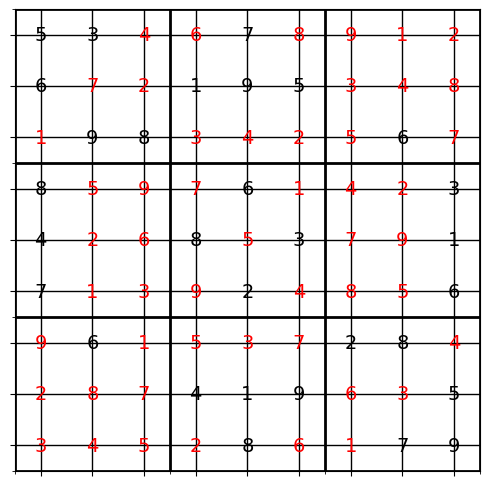

In [9]:
# Exemple de grille à résoudre
simple_puzzle = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

# Copie de la grille initiale pour comparaison
original_puzzle = [row[:] for row in simple_puzzle]

# Résolution et affichage
if is_valid_sudoku_grid(simple_puzzle):
    if solve_sudoku(simple_puzzle):
        print("Grille résolue avec succès :")
        plot_sudoku(simple_puzzle, original_puzzle)
    else:
        print("Impossible de résoudre la grille.")
else:
    print("La grille d'entrée n'est pas valide.")


### Test avancé avec plusieurs grilles
---
Nous chargeons plusieurs puzzles depuis un fichier JSON et mesurons le temps de résolution pour chaque puzzle.

Chargement des puzzles

In [10]:
import json

def load_test_puzzles(filename):
    """
    Charge les grilles de Sudoku depuis un fichier JSON.
    """
    try:
        with open(filename, 'r') as file:
            data = json.load(file)
            return data.get("tests", [])
    except FileNotFoundError:
        print("Erreur : Fichier non trouvé.")
        return []
    except json.JSONDecodeError:
        print("Erreur : Format JSON invalide.")
        return []

# Chargement
test_puzzles = load_test_puzzles("sudoku_tests.json")

Test des grilles


Test : Easy Puzzle
Résolu en 0.033216 secondes.


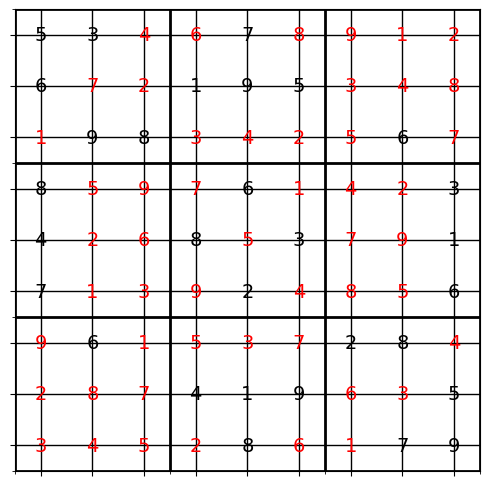


Test : Medium Puzzle
Résolu en 0.078726 secondes.


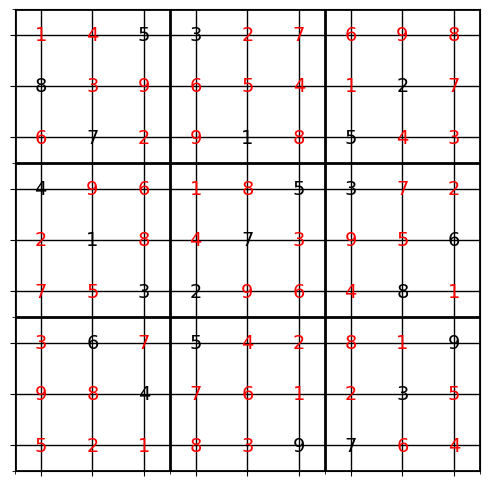

In [11]:
import time

for test in test_puzzles:
    print(f"\nTest : {test['name']}")
    puzzle = test['puzzle']
    original_puzzle = [row[:] for row in puzzle]

    if not is_valid_sudoku_grid(puzzle):
        print("Grille invalide, test ignoré.")
        continue

    start_time = time.time()
    if solve_sudoku(puzzle):
        end_time = time.time()
        print(f"Résolu en {end_time - start_time:.6f} secondes.")
        plot_sudoku(puzzle, original_puzzle)
    else:
        print("Impossible de résoudre la grille.")

## 5. Carrés latins
---

### Implementation
---

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import random
def generate_combinations(n):
    # Fonction récursive pour générer toutes les combinaisons croissantes
    def recursive_combinations(current_combination, level, start):
        if level == n:  # Si la combinaison atteint la longueur n
            combinations.append(current_combination[:])  # Ajouter une copie de la combinaison
            return
        
        for i in range(start, n+1):  # Toujours aller de start à n pour éviter les permutations
            current_combination[level] = i
            recursive_combinations(current_combination, level + 1, i)  # Ne pas revenir en arrière

    combinations = []
    current_combination = [0] * n  # Initialiser une combinaison vide de taille n
    recursive_combinations(current_combination, 0, 1)
    return combinations


def find_combinations_with_trace(n, target_trace):
    # Générer toutes les combinaisons croissantes de {1, 1, ..., 1} à {n, n, ..., n}
    all_combinations = generate_combinations(n)
    
    # Filtrer les combinaisons dont la somme des éléments diagonaux (la trace) correspond à target_trace
    valid_combinations = []
    for comb in all_combinations:
        trace = sum(comb[i] for i in range(n))  # Calcul de la trace (somme des diagonales)
        if trace == target_trace:
            valid_combinations.append(comb)
    
    return valid_combinations

def initialize_matrix(n):
    i=0
    return [[0 for i in range(n)] for i in range(n)]


def fill_diagonal_with_combination(matrix, combination):
    # Remplir les éléments diagonaux de la matrice avec une combinaison donnée
    n = len(matrix)
    for i in range(n):
        matrix[i][i] = combination[i]  # Affecter chaque élément de la combinaison à la diagonale


def is_safe(matrix, row, col, num, n):
    # Vérifie si num peut être placé dans matrix[row][col] sans redondance dans la ligne et la colonne
    for i in range(n):
        if matrix[row][i] == num or matrix[i][col] == num:
            return False
    return True


def solve_latin_square(matrix, n, row=0, col=0):
    # Si nous avons rempli la dernière colonne, passer à la prochaine ligne
    if col == n:
        col = 0
        row += 1
        if row == n:
            return True  # Matrice remplie sans conflit

    # Si l'élément est déjà rempli (appartenant à la diagonale), passer à la prochaine case
    if matrix[row][col] != 0:
        return solve_latin_square(matrix, n, row, col + 1)

    # Essayer d'affecter chaque nombre possible de 1 à n dans la case actuelle
    for num in range(1, n + 1):
        if is_safe(matrix, row, col, num, n):
            matrix[row][col] = num  # Tenter d'affecter num

            # Continuer avec les prochaines cases
            if solve_latin_square(matrix, n, row, col + 1):
                return True

            # Si cela cause un conflit, réinitialiser la case (backtracking)
            matrix[row][col] = 0

    return False  # Pas de solution possible pour cette configuration

def draw_latin_square(solutions, n):
    if not solutions:
        print("No solutions available to draw.")
        return

    # Pick one random solution
    matrix = random.choice(solutions)
    diagonal_sum = sum(matrix[i][i] for i in range(n)) 

    fig, ax = plt.subplots(figsize=(n, n))
    ax.set_axis_off()  # Turn off the axis

    # Add a table to the plot
    tb = Table(ax, bbox=[0, 0, 1, 1])

    # Set the size of each cell
    width, height = 1.0 / n, 1.0 / n

    # Add cells with numbers
    for i in range(n):
        for j in range(n):
            # Add cell to the table
            cell = tb.add_cell(i, j, width, height, 
                               text=str(matrix[i][j]), 
                               loc='center', 
                               facecolor='white', 
                               edgecolor='black')
            # Adjust font size for all cells
            cell.get_text().set_fontsize(14)

            # Highlight diagonal cells
            if i == j:
                # Access the text object inside the cell and modify its properties
                cell.get_text().set_color('red')   # Set text color to red
                cell.get_text().set_weight('bold') # Set text weight to bold

    ax.add_table(tb)
    
    # Add parameters below the visualization
    plt.text(0.5, 0.02, f"N = {n}, Sum of Diagonal = {diagonal_sum}",
             ha='center', va='center', fontsize=14, transform=fig.transFigure)

    # Add a title
    plt.title("Random Latin Square Solution", fontsize=16, pad=20)

    plt.show()

def generate_latin_square(n, target_trace):
    solutions = []  # To store valid solutions
    max_solutions = 100  # Limit for solutions

    # Étape 1: Générer toutes les combinaisons possibles avec la trace
    valid_combinations = find_combinations_with_trace(n, target_trace)
    
    # Étape 2: Pour chaque combinaison, remplir la diagonale et compléter la matrice
    for combination in valid_combinations:
        # Initialiser la matrice avec des zéros
        matrix = initialize_matrix(n)

        # Remplir la diagonale avec la combinaison actuelle
        fill_diagonal_with_combination(matrix, combination)

        # Étape 3: Compléter le reste de la matrice en respectant la non-redondance
        if solve_latin_square(matrix, n):
            solutions.append(matrix)  # Store the successful matrix
            # print("Solution trouvée avec la combinaison : ", combination)
            # for row in matrix:
            #    print(row)
            # print("\n")
        
        if len(solutions) >= max_solutions:
            print(f'Plus de {max_solutions} solutions trouvées.')
            return solutions
        # else:
            # print("Impossible de compléter la matrice avec la combinaison : ", combination)
    print(f'{len(solutions)} solutions trouvées.')
    return solutions  # Return all solutions

In [ ]:
n = 12
target_trace = 90
solutions = generate_latin_square(n, target_trace)

Plus de 100 solutions trouvées.


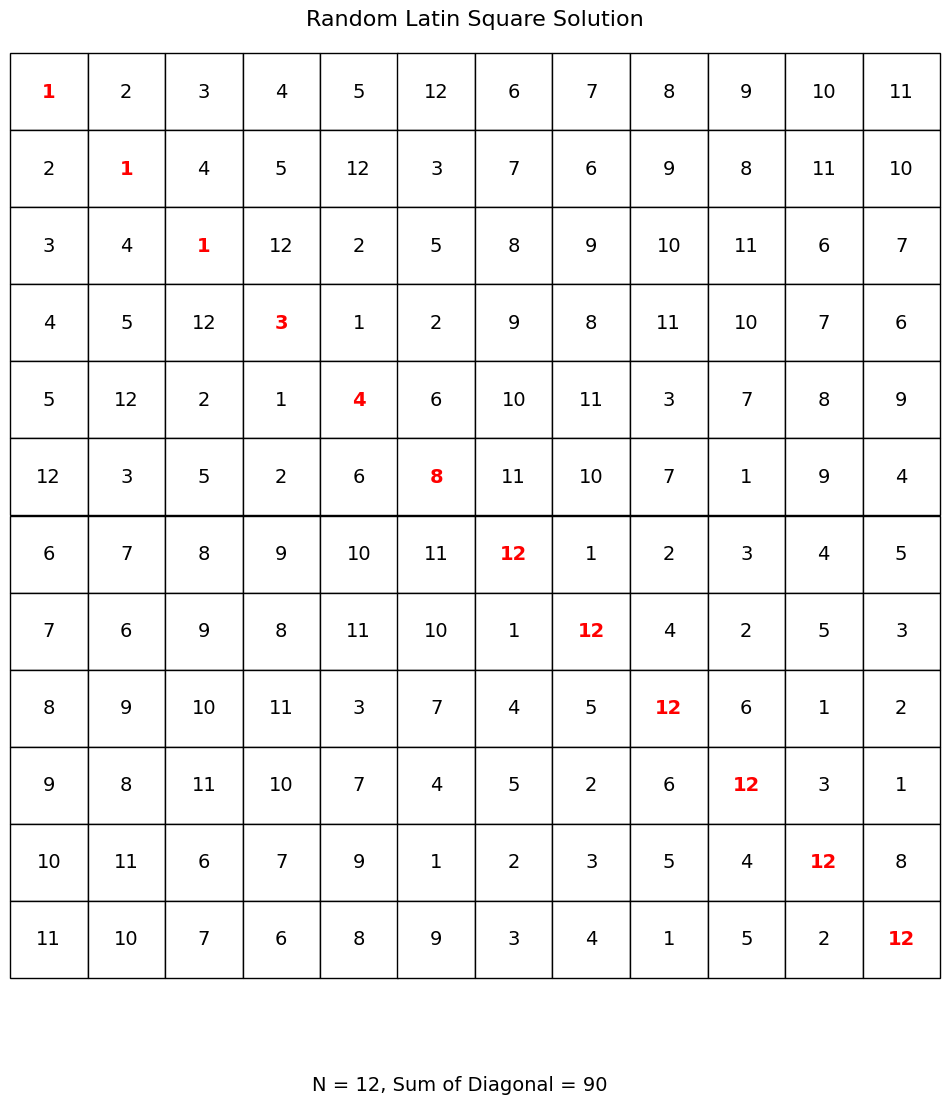

In [ ]:
draw_latin_square(solutions, n)

# **Partie 2 "Calcul Scientifique"**

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_blobs
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
datasets = [
make_moons(noise=0.3, random_state=0),
make_circles(noise=0.2, factor=0.5, random_state=1),
make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

## **NumPy: Régression Logistique**

### **Code**
---

In [ ]:
class LogisticRegression:
    """
    Classe pour implémenter la régression logistique avec deux méthodes d'optimisation : descente de gradient et méthode de Newton.
    """
    def __init__(self, max_iterations=1000, learning_rate=0.01, optimization_method='gradient_descent'):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.weights = None
        self.bias = 0
        self.losses = []
        self.accuracies = []

    def sigmoid(self, x):
        """
        Calcule la fonction sigmoïde pour une valeur ou un tableau donné.
        """
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        """
        Entraîne le modèle en utilisant les données d'entrée X et les étiquettes y.
        La méthode d'optimisation choisie est utilisée.
        """
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        if self.optimization_method == 'gradient_descent':
            self.gradient_descent(X, y)
        elif self.optimization_method == 'Newton':
            self.Newton_method(X, y)
        else:
            raise ValueError("Méthode d'optimisation non reconnue : choisissez 'gradient_descent' ou 'Newton'.")

    def gradient_descent(self, X, y):
        """
        Effectue l'optimisation des poids et du biais en utilisant la méthode de descente de gradient.
        """
        for i in range(self.max_iterations):
            # Calcul des prédictions
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Calcul de l'erreur
            error = predictions - y

            # Mise à jour des poids et du biais
            gradient_w = np.dot(X.T, error) / len(y)
            gradient_b = np.sum(error) / len(y)
            self.weights -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b

            # Calcul de la perte
            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.losses.append(loss)

    def Newton_method(self, X, y):
        """
        Effectue l'optimisation des poids et du biais en utilisant la méthode de Newton.
        """
        for i in range(self.max_iterations):
            # Calcul des prédictions
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Calcul des gradients et de la matrice Hessienne
            gradient_w = np.dot(X.T, predictions - y) / len(y)
            gradient_b = np.sum(predictions - y) / len(y)

            diag = predictions * (1 - predictions)
            hessian = np.dot(X.T, X * diag[:, np.newaxis]) / len(y)

            # Mise à jour des poids et du biais
            self.weights -= np.linalg.solve(hessian, gradient_w)
            self.bias -= gradient_b

            # Calcul de la perte
            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.losses.append(loss)

    def predict(self, X):
        """
        Prend en entrée une ou plusieurs données et retourne les prédictions correspondantes.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_model)
        return (probabilities >= 0.5).astype(int)
        
    def accuracy(self, X, y):
        """
        Calcule l'exactitude des prédictions en comparant les résultats avec les étiquettes réelles.
        """
        predictions = self.predict(X)
        return np.mean(predictions == y) * 100  # Return accuracy as a percentage

### **Documentation : Classe Logistic Regression**
---
**<u>Description</u>** :

La classe LogisticRegression implémente la régression logistique avec deux méthodes d’optimisation : descente de gradient et méthode de Newton. Cette classe est conçue pour entraîner un modèle de classification binaire et effectuer des prédictions.

**<u>Attributs</u>** :

**<span style="color: green;">max_iterations</span>** *(int)*:

Nombre maximal d'itérations pour l'entraînement (par défaut : 1000).

**<span style="color: green;">learning_rate</span>** *(float)*:

Taux d’apprentissage utilisé dans la descente de gradient (par défaut : 0.01).

**<span style="color: green;">optimization_method</span>** *(str)*:

Méthode d'optimisation à utiliser ('gradient_descent' ou 'Newton' ; par défaut : 'gradient_descent').

**<span style="color: green;">weights</span>** *(ndarray)*:

Les poids appris après l'entraînement.

**<span style="color: green;">bias</span>** *(float)*:

Le biais appris après l'entraînement.

**<span style="color: green;">losses</span>** *(list)*:

Une liste des valeurs de la perte enregistrées au cours des itérations.

**<span style="color: green;">accuracies</span>** *(list)*:

Une liste des précisions calculées pendant les itérations (optionnel, non utilisé actuellement).

**<u>Methods</u>** :

<span style="color: blue;">__init__</span> :

Initialise le modèle de régression logistique avec des paramètres spécifiques.

- **Paramètres**
  
    - **max_iterations** *(int)*:
 
      Nombre maximal d’itérations pour l’entraînement.

    - **learning_rate** *(float)*:
 
      Taux d’apprentissage pour la descente de gradient.
  
    - **optimization_method** *(str)*:
 
      Méthode d’optimisation ('gradient_descent' ou 'Newton').
  

<span style="color: blue;">__sigmoid(self,x)__</span> :


- **Paramètres**
  
    - **x** *(float or ndarray)*:
 
      La ou les valeurs en entrée.
  
- **Retourne**

    - *(float or ndarray)*:

      Le résultat de la fonction sigmoïde

  

<span style="color: blue;">__fit(self, X, y)__</span> :

Entraîne le modèle de régression logistique avec les données fournies.

- **Paramètres**
  
    - **X** *(ndarray)*:
 
      Les données d’entrée, de taille (n_samples, n_features).

    - **y** *(ndarray)*:

      Les étiquettes de sortie, de taille (n_samples,).
  
- **Comportement**

    - Utilise la méthode d’optimisation spécifiée.
    - Met à jour les poids et le biais du modèle.
    - Suit la perte à chaque itération.

<span style="color: blue;">__gradient_descent(self, X, y)__</span> :

Optimise les poids et le biais à l’aide de la méthode de descente de gradient.

- **Paramètres**
  
    - **X** *(ndarray)*:
 
      Les données d’entrée, de taille (n_samples, n_features).

    - **y** *(ndarray)*:

      Les étiquettes de sortie, de taille (n_samples,).
  
- **Comportement**

    - Met à jour les poids et le biais à l’aide du gradient de la fonction de perte.
    - Enregistre la perte à chaque itération.

<span style="color: blue;">__Newton_method(self, X, y)__</span> :

Optimise les poids et le biais à l’aide de la méthode de Newton.

- **Paramètres**
  
    - **X** *(ndarray)*:
 
      Les données d’entrée, de taille (n_samples, n_features).

    - **y** *(ndarray)*:

      Les étiquettes de sortie, de taille (n_samples,).
  
- **Comportement**

    - Calcule le gradient et la matrice Hessienne de la fonction de perte.
    - Met à jour les poids et le biais en utilisant la règle de mise à jour de Newton.
    - Enregistre la perte à chaque itération.

<span style="color: blue;">__Predict(self, X)__</span> :

Effectue des prédictions pour les données fournies en entrée.

- **Paramètres**
  
    - **X** *(ndarray)*:
 
      Les données d’entrée, de taille (n_samples, n_features).
  
- **Retourne**

    - *(ndarray)*:

        Les prédictions (valeurs binaires : 0 ou 1) pour chaque exemple.

### Test et évaluation sur les trois  jeux de données
---

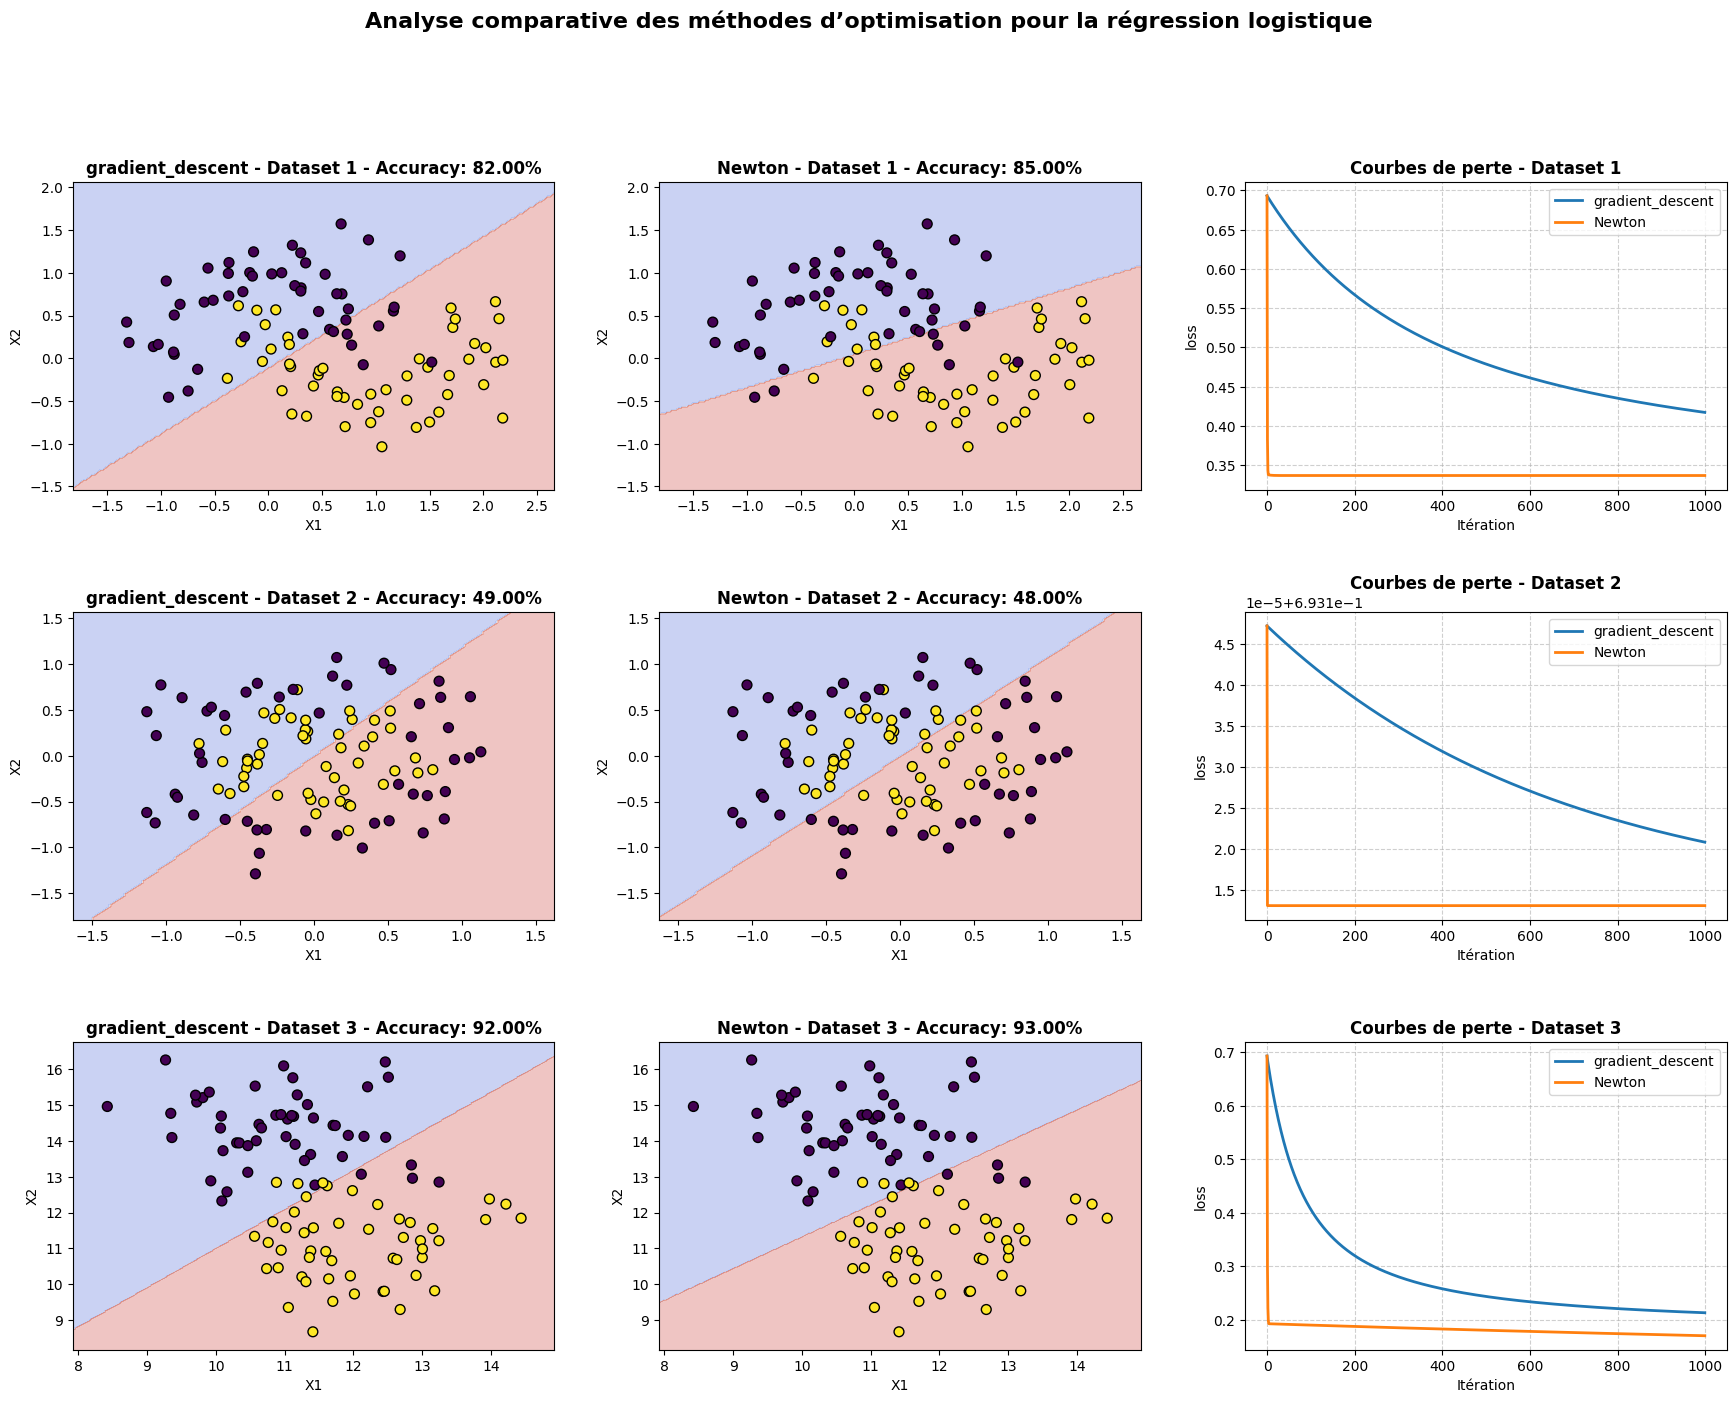

In [ ]:
    methods = ['gradient_descent', 'Newton']
    fig, axs = plt.subplots(len(datasets), 3, figsize=(18, 15))

    # Pour chaque ensemble de données
    for i, data in enumerate(datasets):
        X, y = data

        # Pour chaque méthode
        for j, method in enumerate(methods):
            # Initialisation du modèle de régression logistique
            model = LogisticRegression(max_iterations=1000, optimization_method=method)
            
            # Entraînement du modèle sur les données
            model.fit(X, y)
            
            # Calculate final accuracy
            final_accuracy = model.accuracy(X, y)

            # Tracer decision boundary
            x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
            x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
            xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
            Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
            Z = Z.reshape(xx1.shape)
            
            # Visualisation 
            axs[i][j].contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
            axs[i][j].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', s=50)  
            axs[i][j].set_xlim(xx1.min(), xx1.max())
            axs[i][j].set_ylim(xx2.min(), xx2.max())
            
            # Update the title with accuracy
            axs[i][j].set_title(f"{method} - Dataset {i+1} - Accuracy: {final_accuracy:.2f}%", fontsize=12, fontweight='bold')
            axs[i][j].set_xlabel("X1")
            axs[i][j].set_ylabel("X2")

            # Tracer les courbes de loss
            axs[i][2].plot(model.losses, label=f'{method}', linewidth=2)
            axs[i][2].set_xlabel('Itération', fontsize=10)
            axs[i][2].set_ylabel('loss', fontsize=10)
            axs[i][2].set_title(f"Courbes de perte - Dataset {i+1}", fontsize=12, fontweight='bold')
            axs[i][2].grid(True, linestyle='--', alpha=0.6)
            axs[i][2].legend(fontsize=10)

    # Ajouter un titre global pour toutes les sous-figures
    fig.suptitle('Analyse comparative des méthodes d’optimisation pour la régression logistique', fontsize=16, fontweight='bold')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95], pad=3.0)

    plt.show()


**<u>Note</u>**:

- **La méthode de Newton surpasse la descente de gradient** : Elle converge plus rapidement et produit des frontières de décision plus précises sur tous les datasets.
- **La descente de gradient est plus lente** : Bien qu'elle soit efficace pour séparer les classes, elle nécessite beaucoup plus d'itérations pour converger, comme le montrent les courbes de perte.
- **Complexité des datasets** : Les deux méthodes fonctionnent bien, mais la méthode de Newton excelle pour des datasets avec des séparations nettes des classes grâce à sa rapidité.
- **Recommandation pratique** : Utilisez la méthode de Newton pour des datasets de petite ou moyenne taille nécessitant une haute précision. La descente de gradient est mieux adaptée aux grands ensembles de données avec des contraintes de calcul.
- **Limitation de la régression logistique sur les datasets non-linéaires** : La régression logistique n'est pas bien adaptée aux datasets non linéaires comme le Dataset 2, et ne gère pas correctement les données polynomiales sans ajustement préalable. Pour ces cas, il est recommandé d'utiliser des algorithmes comme les arbres de décision, les forêts aléatoires ou les support vecteur machine (SVM), que nous allons explorer dans les prochaines étapes.

## **Arbre de décision et Foret aléatoire**

# Implémentation d'un Arbre de Décision from Scratch

Dans ce notebook, nous avons implémenté un arbre de décision à partir de zéro en utilisant Python et la bibliothèque **NumPy**. Un arbre de décision est un modèle d'apprentissage supervisé utilisé pour les tâches de classification et de régression. Dans cette implémentation, nous avons choisi deux critères d'impureté : l'indice de Gini et l'entropie, et nous avons développé un algorithme pour construire un arbre en utilisant ces critères pour la division des données.

## Classe `DecisionTree`

La classe `DecisionTree` implémente les fonctionnalités suivantes :
- **Critères d'impureté** : L'indice de Gini et l'entropie sont calculés pour mesurer la "pureté" des divisions à chaque nœud de l'arbre.
- **Croissance de l'arbre** : L'arbre est construit récursivement en trouvant la meilleure séparation des données à chaque étape.
- **Prédictions** : Le modèle peut faire des prédictions sur des données nouvelles après avoir été entraîné.

### Initialisation et paramètres :
- `criterion` : Le critère utilisé pour l'impureté (par défaut, "gini", mais peut être défini sur "entropy").
- `max_depth` : La profondeur maximale de l'arbre (aucune limite par défaut).

### Méthodes :

#### `gini(y)`
Calcule l'indice de Gini pour un vecteur de labels `y`.

#### `entropy(y)`
Calcule l'entropie pour un vecteur de labels `y`.

#### `impurity(y)`
Renvoie l'impureté en fonction du critère choisi : "gini" ou "entropy".

#### `best_split(X, y)`
Trouve la meilleure division des données en fonction du critère d'impureté, en testant toutes les caractéristiques et tous les seuils possibles.

#### `grow_tree(X, y, depth=0)`
Construit l'arbre de décision de manière récursive, en divisant les données et en créant des nœuds internes ou des feuilles en fonction des critères définis.

#### `fit(X, y)`
Entraîne l'arbre de décision sur un ensemble de données d'entraînement `X` et `y`.

#### `predict_one(x, tree)`
Effectue une prédiction pour une seule observation `x` en utilisant l'arbre `tree`.

#### `predict(X)`
Effectue des prédict dnTree(criterion="gini", max_depth=3)
model.fit(X, y)


In [3]:
import numpy as np

class DecisionTree:
    def __init__(self, criterion="gini", max_depth=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = None

    def gini(self, y):
        """Calcule l'indice de Gini."""
        classes, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        return 1 - np.sum(p**2)

    def entropy(self, y):
        """Calcule l'entropie."""
        classes, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        return -np.sum(p * np.log2(p))

    def impurity(self, y):
        """Calcule l'impureté en fonction du critère choisi."""
        if self.criterion == "gini":
            return self.gini(y)
        elif self.criterion == "entropy":
            return self.entropy(y)
        else:
            raise ValueError("Critère non supporté : utilisez 'gini' ou 'entropy'.")

    def best_split(self, X, y):
        """Trouve la meilleure découpe des données."""
        best_feature, best_threshold, best_impurity = None, None, float("inf")
        n_samples, n_features = X.shape

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_impurity = self.impurity(y[left_mask])
                right_impurity = self.impurity(y[right_mask])
                weighted_impurity = (np.sum(left_mask) * left_impurity +
                                     np.sum(right_mask) * right_impurity) / n_samples

                if weighted_impurity < best_impurity:
                    best_feature, best_threshold, best_impurity = feature, threshold, weighted_impurity

        return best_feature, best_threshold

    def grow_tree(self, X, y, depth=0):
        """Construit l'arbre récursivement."""
        if len(np.unique(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return {"type": "leaf", "class": np.bincount(y).argmax()}

        feature, threshold = self.best_split(X, y)
        if feature is None:
            return {"type": "leaf", "class": np.bincount(y).argmax()}

        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask

        return {
            "type": "node",
            "feature": feature,
            "threshold": threshold,
            "left": self.grow_tree(X[left_mask], y[left_mask], depth + 1),
            "right": self.grow_tree(X[right_mask], y[right_mask], depth + 1),
        }

    def fit(self, X, y):
        """Entraîne l'arbre de décision."""
        self.tree = self.grow_tree(X, y)

    def predict_one(self, x, tree):
        """Prédit une observation individuelle."""
        if tree["type"] == "leaf":
            return tree["class"]
        if x[tree["feature"]] <= tree["threshold"]:
            return self.predict_one(x, tree["left"])
        else:
            return self.predict_one(x, tree["right"])

    def predict(self, X):
        """Prédit pour un ensemble de données."""
        return np.array([self.predict_one(x, self.tree) for x in X])

# Implémentation d'une Forêt Aléatoire (Random Forest)

Dans ce notebook, nous avons implémenté une **Forêt Aléatoire** à partir de zéro en utilisant Python et la bibliothèque **NumPy**. Une forêt aléatoire est un ensemble d'arbres de décision qui utilisent le "bagging" (bootstrap aggregating) pour améliorer la performance des modèles de classification. Chaque arbre est entraîné sur un échantillon aléatoire des données, et les prédictions sont effectuées par un vote majoritaire.

## Classe `RandomForest`

La classe `RandomForest` implémente les fonctionnalités suivantes :
- **Entraînement avec bootstrap** : Chaque arbre de la forêt est entraîné sur un échantillon aléatoire des données d'entraînement.
- **Prédiction par vote majoritaire** : Les prédictions de chaque arbre sont combinées par un vote majoritaire pour prédire la classe finale.

### Initialisation et paramètres :
- `n_estimators` : Le nombre d'arbres dans la forêt (par défaut 100).
- `criterion` : Le critère utilisé pour l'impureté (par défaut "gini").
- `max_depth` : La profondeur maximale des arbres (aucune limite par défaut).
- `trees` : Liste contenant les arbres de décision entraînés.

### Méthodes :

#### `bootstrap(X, y)`
Génère un échantillon bootstrap en échantillonnant avec remise les indices des données d'entraînement `X` et `y`.

#### `fit(X, y)`
Entraîne la forêt aléatoire en créant un certain nombre d'arbres (`n_estimators`), chacun entraîné sur un échantillon bootstrap des données d'entrée `X` et des étiquettes `y`.

#### `predict(X)`
Effectue des prédictions en faisant un vote majoritaire parmi les prédictions "gini", max_depth=3)
forest.fit(X, y)


In [4]:
class RandomForest:
    def __init__(self, n_estimators=100, criterion="gini", max_depth=None):
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.trees = []

    def bootstrap(self, X, y):
        """Génère un échantillon bootstrap."""
        indices = np.random.choice(len(X), size=len(X), replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        """Entraîne la forêt aléatoire."""
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap(X, y)
            tree = DecisionTree(criterion=self.criterion, max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """Prédit en votant par majorité."""
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_predictions)
        return majority_votes


# Classification de Données Synthétiques avec Arbre de Décision et Forêt Aléatoire

## Description du Projet

Ce projet vise à tester deux algorithmes d'apprentissage supervisé : **l'arbre de décision** et **la forêt aléatoire**, implémentés from scratch, sur différents ensembles de données synthétiques. L'objectif est de comparer leurs performances en termes de précision et de visualiser les résultats.

## Bibliothèques Utilisées

- `matplotlib` : Pour la visualisation des résultats.
- `sklearn.datasets` : Pour la génération de données synthétiques.
- `sklearn.model_selection` : Pour la séparation des ensembles de données en train et test.
- `sklearn.metrics` : Pour évaluer la précision des modèles.

## Datasets

Trois ensembles de données synthétiques sont utilisés :
1. **Moons** : Données en forme de deux croissants (avec bruit).
2. **Circles** : Données en deux cercles concentriques (avec bruit).
3. **Blobs** : Données en deux amas séparés par une certaine distance.

## Étapes du Code

1. **Génération des données** : Chaque dataset est généré avec du bruit pour ajouter de la complexité.
2. **Séparation Train/Test** : Les données sont divisées à 80% pour l'entraînement et 20% pour le test.
3. **Entraînement des modèles** :
   - Un **arbre de décision** avec une profondeur maximale de 3.
   - Une **forêt aléatoire** composée de 5 arbres, chacun avec une profondeur maximale de 3.
4. **Évaluation des performances** : La précision des deux modèles est calculée sur l'ensemble de test.
5. **Visualisation** : Les prédictions sont visualisées à l'aide de scatter plots.

## Résultats Attendus

Pour chaque dataset :
- La précision des modèles sera affichée.
- Deux graphiques seront générés :
  - **Arbre de décision** : Visualisation des prédictions.
  - **Forêt aléatoire** : allées.
pip install matplotlib scikit-learn
 et


Dataset 1:
Entraînement de l'arbre de décision...
Précision de l'arbre de décision : 0.95
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire : 0.95


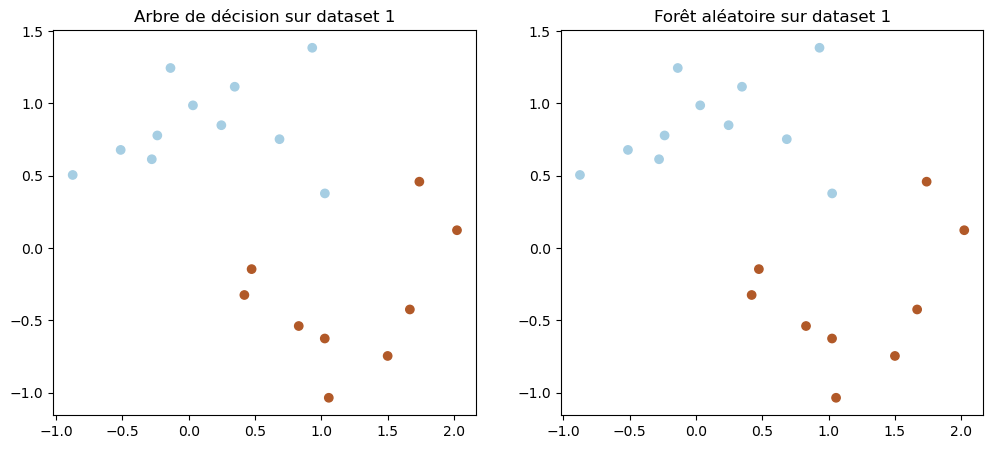

--------------------------------------------------
Dataset 2:
Entraînement de l'arbre de décision...
Précision de l'arbre de décision : 0.80
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire : 0.75


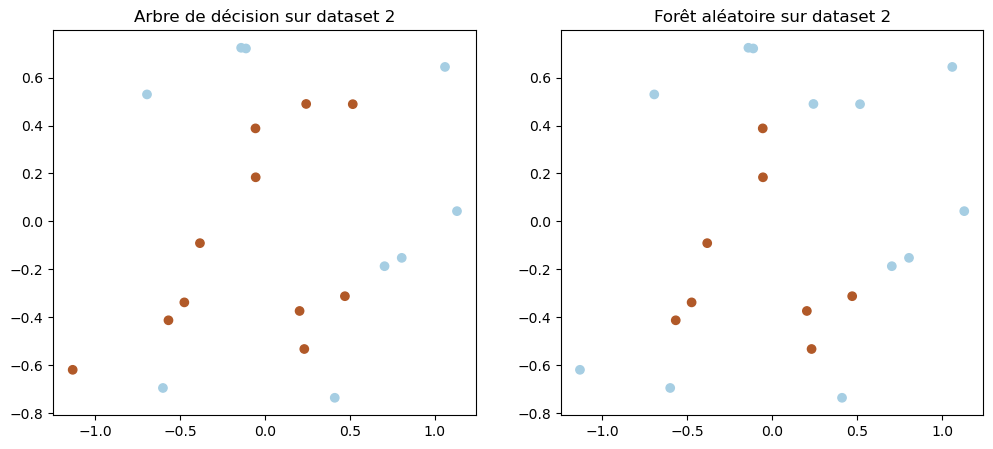

--------------------------------------------------
Dataset 3:
Entraînement de l'arbre de décision...
Précision de l'arbre de décision : 0.90
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire : 0.90


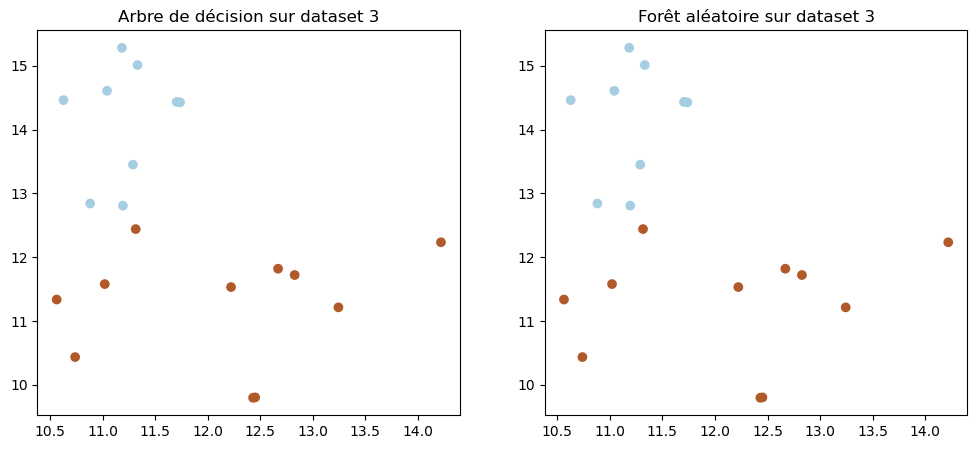

--------------------------------------------------


In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Génération des datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Tester les modèles sur chaque dataset
for i, (X, y) in enumerate(datasets):
    print(f"Dataset {i + 1}:")

    # Séparation en train et test (80% pour l'entraînement, 20% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entraînement de l'arbre de décision
    print("Entraînement de l'arbre de décision...")
    dt = DecisionTree(criterion="gini", max_depth=3)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Précision de l'arbre de décision : {accuracy_dt:.2f}")

    # Entraînement de la forêt aléatoire
    print("Entraînement de la forêt aléatoire...")
    rf = RandomForest(n_estimators=5, criterion="gini", max_depth=3)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Précision de la forêt aléatoire : {accuracy_rf:.2f}")

    # Visualisation des résultats
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"Arbre de décision sur dataset {i + 1}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_dt, cmap=plt.cm.Paired)

    plt.subplot(1, 2, 2)
    plt.title(f"Forêt aléatoire sur dataset {i + 1}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_rf, cmap=plt.cm.Paired)

    plt.show()
    print("-" * 50)

# Classification de Données Synthétiques avec Arbre de Décision et Forêt Aléatoire (Scikit-learn)

## Description du Projet

Ce projet utilise les modèles préimplémentés de Scikit-learn pour classifier trois ensembles de données synthétiques à l'aide de deux algorithmes d'apprentissage supervisé :
- **Arbre de décision** (`DecisionTreeClassifier`)
- **Forêt aléatoire** (`RandomForestClassifier`)

L'objectif est de comparer leurs performances et de visualiser les résultats.

## Bibliothèques Utilisées

- `Scikit-learn` : Pour l'implémentation des algorithmes de classification et la génération des datasets.
- `Matplotlib` : Pour visualiser les prédictions.

## Datasets

Trois ensembles de données synthétiques sont générés :
1. **Moons** : Données en forme de deux croissants.
2. **Circles** : Données en deux cercles concentriques.
3. **Blobs** : Données en deux amas générés aléatoirement.

## Étapes du Code

1. **Génération des Données** : Trois datasets sont créés avec différents niveaux de bruit.
2. **Séparation Train/Test** : Chaque dataset est divisé en 80% pour l'entraînement et 20% pour le test.
3. **Entraînement des Modèles** :
   - Un **arbre de décision** avec une profondeur maximale de 3.
   - Une **forêt aléatoire** composée de 5 arbres, chacun avec une profondeur maximale de 3.
4. **Évaluation des Modèles** : Les précisions sont calculées et affichées pour chaque modèle.
5. **Visualisation** : Les résultats sont affichés sous forme de scatter plots pour chaque modèle.

## Résultats Attendus

Pour chaque dataset :
- **Précision de l'arbre de décision** et **précision de la forêt aléatoire** seront affichées.
- Deux graphiques seront générés pour visuaallées.
pip install matplotlib scikit-learn


Dataset 1 (Scikit-learn):
Entraînement de l'arbre de décision...
Précision de l'arbre de décision (Scikit-learn) : 0.95
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire (Scikit-learn) : 0.95


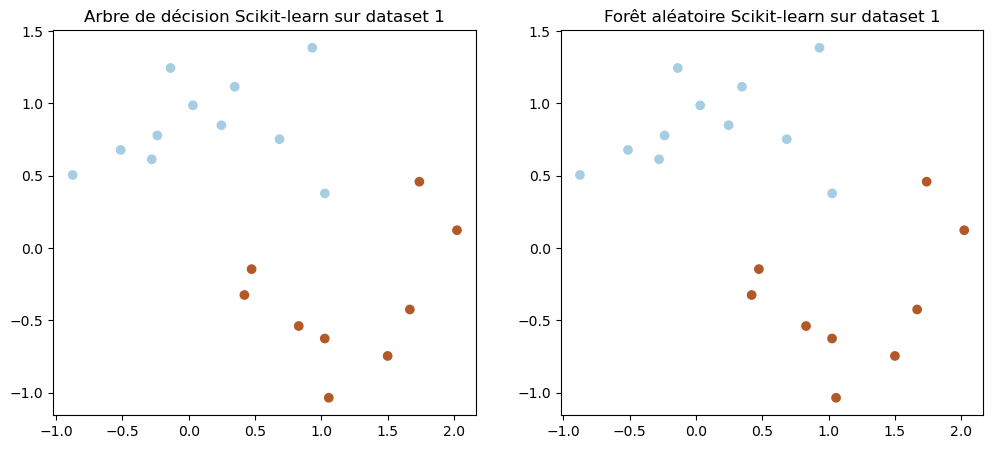

--------------------------------------------------
Dataset 2 (Scikit-learn):
Entraînement de l'arbre de décision...
Précision de l'arbre de décision (Scikit-learn) : 0.75
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire (Scikit-learn) : 0.75


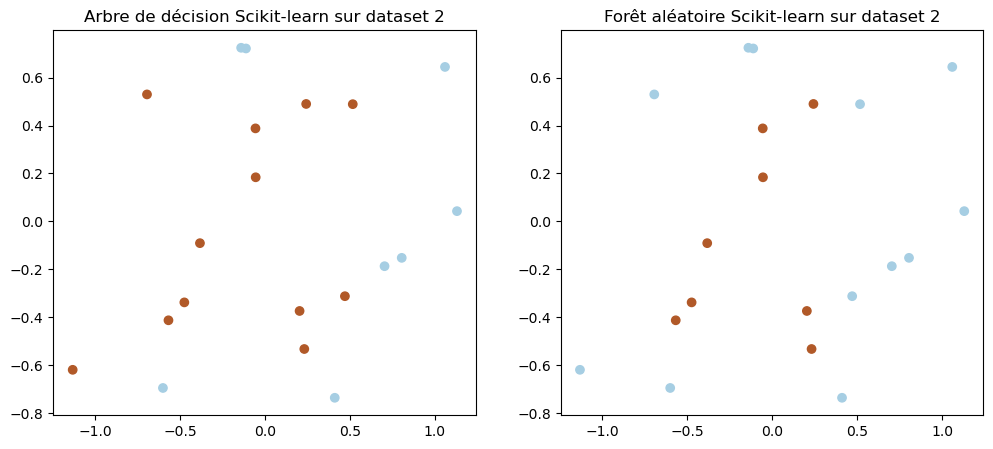

--------------------------------------------------
Dataset 3 (Scikit-learn):
Entraînement de l'arbre de décision...
Précision de l'arbre de décision (Scikit-learn) : 0.90
Entraînement de la forêt aléatoire...
Précision de la forêt aléatoire (Scikit-learn) : 0.95


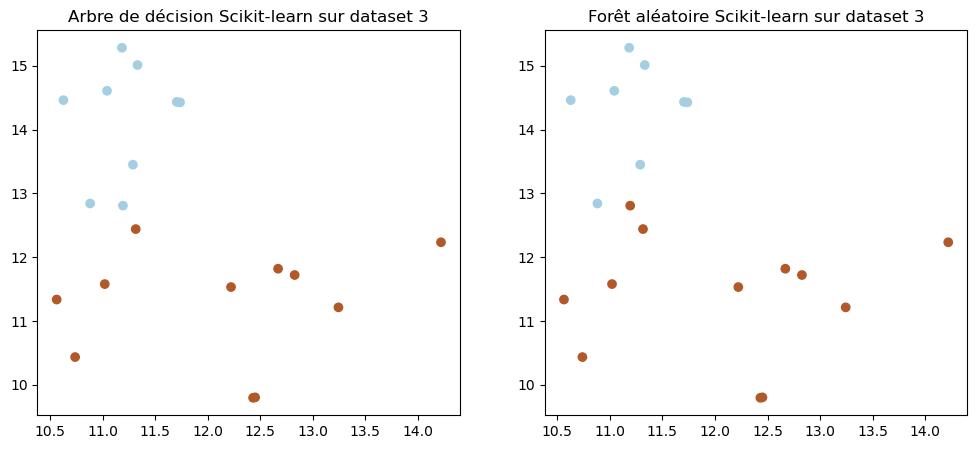

--------------------------------------------------


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Génération des datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Tester les modèles Scikit-learn sur chaque dataset
for i, (X, y) in enumerate(datasets):
    print(f"Dataset {i + 1} (Scikit-learn):")

    # Séparation en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Arbre de décision Scikit-learn
    print("Entraînement de l'arbre de décision...")
    sk_dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
    sk_dt.fit(X_train, y_train)
    y_pred_sk_dt = sk_dt.predict(X_test)
    accuracy_sk_dt = accuracy_score(y_test, y_pred_sk_dt)
    print(f"Précision de l'arbre de décision (Scikit-learn) : {accuracy_sk_dt:.2f}")

    # Forêt aléatoire Scikit-learn
    print("Entraînement de la forêt aléatoire...")
    sk_rf = RandomForestClassifier(n_estimators=5, criterion="gini", max_depth=3, random_state=0)
    sk_rf.fit(X_train, y_train)
    y_pred_sk_rf = sk_rf.predict(X_test)
    accuracy_sk_rf = accuracy_score(y_test, y_pred_sk_rf)
    print(f"Précision de la forêt aléatoire (Scikit-learn) : {accuracy_sk_rf:.2f}")

    # Visualisation des résultats
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"Arbre de décision Scikit-learn sur dataset {i + 1}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sk_dt, cmap=plt.cm.Paired)

    plt.subplot(1, 2, 2)
    plt.title(f"Forêt aléatoire Scikit-learn sur dataset {i + 1}")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sk_rf, cmap=plt.cm.Paired)

    plt.show()
    print("-" * 50)

# Comparaison des Modèles : Arbre de Décision et Forêt Aléatoire (From Scratch vs Scikit-learn)

Ce projet compare les performances des modèles **Arbre de Décision** et **Forêt Aléatoire**, à la fois implémentés **from scratch** et avec **Scikit-learn**. Les modèles sont évalués sur trois jeux de données synthétiques (`make_moons`, `make_circles`, `make_blobs`).

## Structure du Code

### 1. **Importation des Bibliothèques**
Le code commence par importer les bibliothèques nécessaires :
- `numpy`, `matplotlib`, et `time` pour les calculs et la visualisation.
- `sklearn` pour les modèles prédéfinis et la génération des jeux de données.
- `pandas` pour stocker et analyser les résultats.

### 2. **Génération des Jeux de Données**
Trois jeux de données synthétiques sont créés :
- **`make_moons`** : Dataset en forme de lunes croisées.
- **`make_circles`** : Dataset en forme de cercles imbriqués.
- **`make_blobs`** : Dataset avec des blobs de points répartis dans l'espace.

### 3. **Initialisation des Résultats**
Un dictionnaire `results` est utilisé pour stocker :
- Le nom du modèle (`Model`).
- Le type de modèle (from scratch ou Scikit-learn).
- Le dataset utilisé (`Dataset`).
- La précision (`Accuracy`).
- Le temps d'entraînement (`Training Time`).

### 4. **Fonction `evaluate_model`**
Cette fonction entraîne un modèle, prédit les étiquettes et calcule :
- Le **temps d'entraînement**.
- La **précision** sur les données de test.
Les résultats sont ajoutés au dictionnaire `results`.

### 5. **Comparaison des Modèles**
Pour chaque jeu de données, les modèles suivants sont entraînés et évalués :
- **Arbre de Décision** :
  - From Scratch.
  - Scikit-learn.
- **Forêt Aléatoire** :
  - From Scratch.
  - Scikit-learn.

### 6. **Visualisation des Résultats**
Les résultats sont affichés sous forme de graphiques :
- **Précision** : Pourcentage des prédictions correctes.
- **Temps d'entraînement** : Durée pour entraîner chaque modèle.

## Visualisation
Deux graphiques à barres sont générés :
- Le premier montre la **précision** de chaque modèle.
- Le second montre le **temps d'entraînement**.

Chaque graphique compare les modèles **From Scratch** et **Scikit-learn** sur les trois datasets.



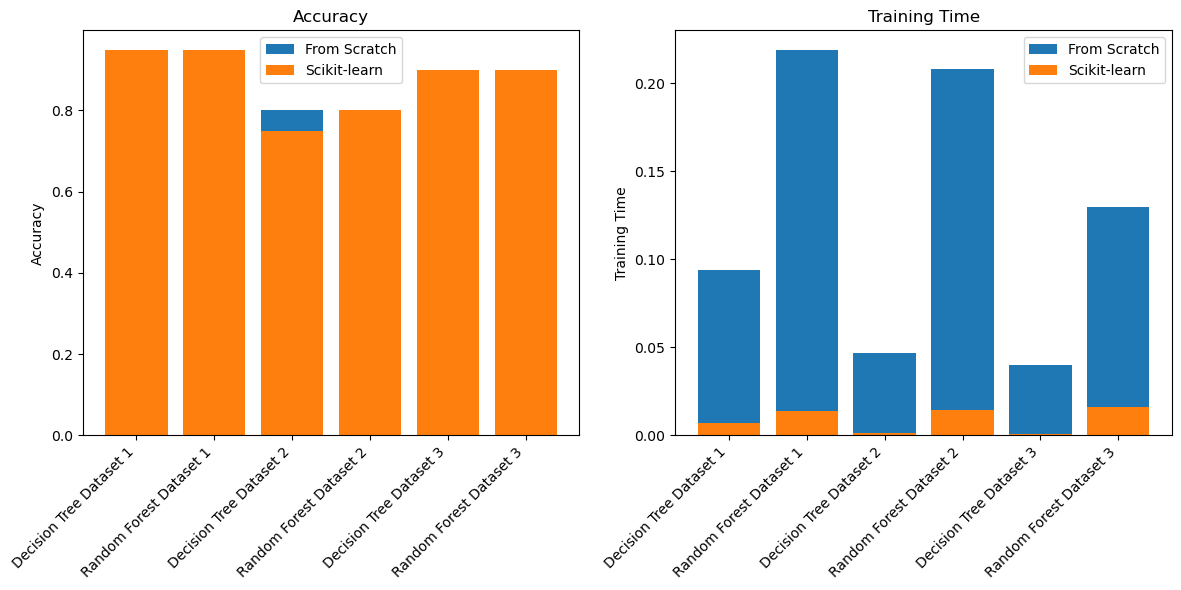

In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Génération des datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

# Initialisation des résultats
results = {
    "Model": [],
    "Type": [],
    "Dataset": [],
    "Accuracy": [],
    "Training Time": []
}

# Fonction de mesure des performances
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, model_type, dataset_name):
    start_train = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_train

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Stockage des résultats
    results["Model"].append(model_name)
    results["Type"].append(model_type)
    results["Dataset"].append(dataset_name)
    results["Accuracy"].append(accuracy)
    results["Training Time"].append(training_time)

# Comparaison pour chaque dataset
for i, (X, y) in enumerate(datasets):
    dataset_name = f"Dataset {i+1}"
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Decision Tree - From Scratch
    dt_scratch = DecisionTree(criterion="gini", max_depth=3)
    evaluate_model(dt_scratch, X_train, X_test, y_train, y_test, "Decision Tree", "From Scratch", dataset_name)

    # Decision Tree - Scikit-learn
    dt_sklearn = DecisionTreeClassifier(criterion="gini", max_depth=3)
    evaluate_model(dt_sklearn, X_train, X_test, y_train, y_test, "Decision Tree", "Scikit-learn", dataset_name)

    # Random Forest - From Scratch
    rf_scratch = RandomForest(n_estimators=5, criterion="gini", max_depth=3)
    evaluate_model(rf_scratch, X_train, X_test, y_train, y_test, "Random Forest", "From Scratch", dataset_name)

    # Random Forest - Scikit-learn
    rf_sklearn = RandomForestClassifier(n_estimators=5, criterion="gini", max_depth=3)
    evaluate_model(rf_sklearn, X_train, X_test, y_train, y_test, "Random Forest", "Scikit-learn", dataset_name)

# Visualisation des résultats
import pandas as pd

df_results = pd.DataFrame(results)
metrics = ["Accuracy", "Training Time"]

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 2, i + 1)
    for model_type in df_results["Type"].unique():
        subset = df_results[df_results["Type"] == model_type]
        plt.bar(
            subset["Model"] + " " + subset["Dataset"],
            subset[metric],
            label=model_type
        )
    plt.title(metric)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()


## Machine à Vecteurs de Support (SVM) avec NumPy et CVXPY
---
### Introduction
---
Dans cet exercice, nous implémentons une Machine à Vecteurs de Support (SVM) en utilisant exclusivement les bibliothèques suivantes :
- NumPy : Pour la manipulation des tableaux et les calculs de base.
- CVXPY : Pour la résolution des problèmes d'optimisation convexes.
- Matplotlib : Pour la visualisation des frontières de décision et des performances.

L'objectif est de :
1. Implémenter une classe SVM avec deux types de noyaux : linéaire et RBF.
2. Résoudre le problème d'optimisation associé aux SVM en utilisant CVXPY.
3. Visualiser les frontières de décision sur trois jeux de données différents.


In [27]:
# Importations nécessaires
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.metrics import accuracy_score


In [28]:
# Génération des datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]
titles = ['Moons', 'Circles', 'Blobs']


In [29]:
# Définition de la classe SVM
class SVM:
    def __init__(self, kernel='linear', C=1.0):
        self.kernel = kernel
        self.C = C
        self.alphas = None
        self.b = None
        self.support_vectors_ = None
        self.support_vector_labels_ = None
        self.X_train = None
        self.y_train = None

    def kernel_function(self, X, Z):
        if self.kernel == 'linear':
            return np.dot(X, Z.T)
        elif self.kernel == 'rbf':
            gamma = 1.0 / X.shape[1]
            diff = X[:, np.newaxis, :] - Z[np.newaxis, :, :]
            return np.exp(-gamma * np.sum(diff ** 2, axis=2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.where(y <= 0, -1, 1)
        n_samples = X.shape[0]

        # Calculer la matrice de noyau
        K = self.kernel_function(X, X)

        # Symétriser K et ajouter une petite perturbation
        K = (K + K.T) / 2
        K += np.eye(n_samples) * 1e-6

        # Définir le problème d'optimisation
        alphas = cp.Variable(n_samples)
        P = cp.psd_wrap(K * (self.y_train.reshape(-1, 1) @ self.y_train.reshape(1, -1)))
        objective = cp.Maximize(cp.sum(alphas) - 0.5 * cp.quad_form(alphas, P))

        constraints = [
            alphas >= 0,
            alphas <= self.C,
            cp.sum(cp.multiply(alphas, self.y_train)) == 0
        ]

        # Résoudre
        problem = cp.Problem(objective, constraints)
        try:
            result = problem.solve(solver=cp.SCS, verbose=False)
            if problem.status not in ["optimal", "optimal_inaccurate"]:
                print(f"Warning: Optimization status {problem.status}")
                return
        except Exception as e:
            print(f"Erreur d'optimisation: {e}")
            return

        # Extraire les vecteurs de support
        self.alphas = alphas.value
        sv_mask = self.alphas > 1e-5
        self.support_vectors_ = X[sv_mask]
        self.support_vector_labels_ = self.y_train[sv_mask]
        self.alphas = self.alphas[sv_mask]

        # Calculer b
        if len(self.support_vectors_) > 0:
            K_sv = self.kernel_function(self.support_vectors_, self.support_vectors_)
            predictions = np.sum(
                self.alphas[:, np.newaxis] * self.support_vector_labels_[:, np.newaxis] * K_sv,
                axis=0
            )
            self.b = np.mean(self.support_vector_labels_ - predictions)
        else:
            self.b = 0
            print("Aucun vecteur support trouvé!")

    def predict(self, X):
        if self.support_vectors_ is None or len(self.support_vectors_) == 0:
            return np.zeros(len(X))
        
        K = self.kernel_function(X, self.support_vectors_)
        return np.sign(
            np.sum(self.alphas * self.support_vector_labels_ * K, axis=1) + self.b
        )


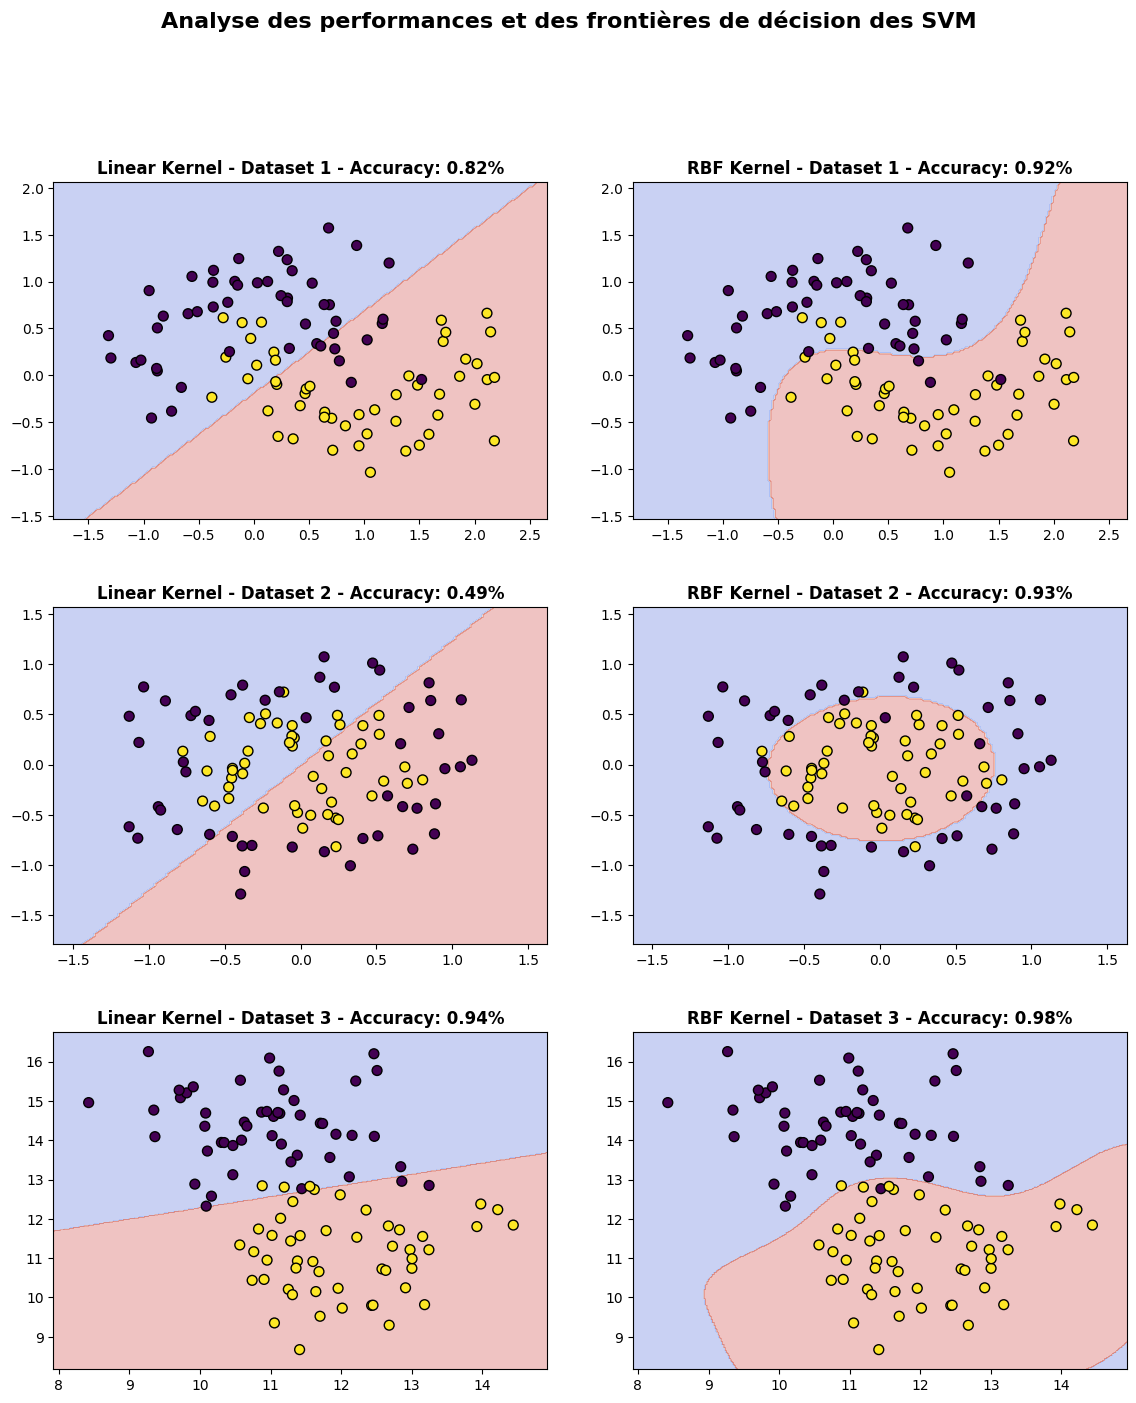

In [30]:
#  Visualisation des résultats
fig, axs = plt.subplots(len(datasets), 2, figsize=(12, 15))  # 2 colonnes au lieu de 3

for i, (X, y) in enumerate(datasets):
    y_binary = np.where(y <= 0, -1, 1)

    # SVM linéaire
    svm_linear = SVM(kernel='linear', C=0.025)
    svm_linear.fit(X, y_binary)
    accuracy_linear = accuracy_score(y_binary, svm_linear.predict(X))

    # SVM RBF
    svm_rbf = SVM(kernel='rbf', C=1.0)
    svm_rbf.fit(X, y_binary)
    accuracy_rbf = accuracy_score(y_binary, svm_rbf.predict(X))

    # Tracer la frontière pour le noyau linéaire
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    Z_linear = svm_linear.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z_linear = Z_linear.reshape(xx1.shape)
    
    axs[i][0].contourf(xx1, xx2, Z_linear, alpha=0.3, cmap='coolwarm')
    axs[i][0].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', s=50)  
    axs[i][0].set_title(f"Linear Kernel - Dataset {i+1} - Accuracy: {accuracy_linear:.2f}%", fontsize=12, fontweight='bold')

    # Tracer la frontière pour le noyau RBF
    Z_rbf = svm_rbf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z_rbf = Z_rbf.reshape(xx1.shape)
    axs[i][1].contourf(xx1, xx2, Z_rbf, alpha=0.3, cmap='coolwarm')
    axs[i][1].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', s=50)  
    axs[i][1].set_title(f"RBF Kernel - Dataset {i+1} - Accuracy: {accuracy_rbf:.2f}%", fontsize=12, fontweight='bold')

# Ajouter un titre global pour toutes les sous-figures
fig.suptitle('Analyse des performances et des frontières de décision des SVM', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95], pad=3.0)

plt.show()


In [31]:
# Affichage des performances
print("Performance Metrics:")
for dataset, kernel, accuracy in performance:
    print(f"Dataset: {dataset}, Kernel: {kernel}, Accuracy: {accuracy:.2f}")


Performance Metrics:
Dataset: Moons, Kernel: Linear, Accuracy: 0.82
Dataset: Moons, Kernel: RBF, Accuracy: 0.92
Dataset: Circles, Kernel: Linear, Accuracy: 0.49
Dataset: Circles, Kernel: RBF, Accuracy: 0.93
Dataset: Blobs, Kernel: Linear, Accuracy: 0.94
Dataset: Blobs, Kernel: RBF, Accuracy: 0.98
